# Finite volume methods for Lighthill–Whitham–Richards traffic flow model

**Plan of the project**
- Introduction
- Theory behind Lighthill–Whitham–Richards traffic flow model
- Finite volume method - theoretical explaination
- Finite volume method - implementation
- GUI*
- Finite volume method - consistency
- Finite volume method - convergence
- Finite volume method - stability
- Summary and conclusions

**Resources**

[1] Piccoli Benedetto, Tosin Andrea *Vehicular Traffic: A Review of Continuum Mathematical Models* (artykuł od Płotka)

[2] Płociniczak Łukasz *Numerical methods for differential equations* Lecture notes (wykład Płotka do metod numerycznych)

## Introduction

## Introduction: the macroscopic model of vehicular traffic

Source: [1] chap. Macroscopic Modeling

In macroscopic vehicular modeling we don't look at vehicules individually - we measure some average quantities like density of vehicules on a road at specific time $t$ and specific point $x$ or mean velocity. Usually the motion of cars on a road is one dimentional, so we will be considering this case in which we have only one line road and spatial coordinate $x$ is a scalar independent variable in an appropriate subset of $\mathbb{R}$. 

The main dependent variables introduced to describe the problem are:
- $\rho = \rho(t, x)$ density of cars at time $t$ in the point $x$,
- $u = u(t, x)$ average velocity at time $t$ in the point $x$,
- $q = q(\rho) = \rho u\left(x,t\right)$ the flux, the number of cars passing through an imaginary gate in a given time.  


From the principle of conservation of the vehicles we have 
$$\frac{\partial \rho}{\partial t} + \frac{\partial q\left(\rho\right)}{\partial x} = 0,$$
which means
$$\frac{\partial \rho}{\partial t} + \frac{\partial}{\partial x}\left(\rho u\right) = 0.$$

Looking at conservation law's equation we can see that the time difference in the amount of cars in the stretch of road between point $x_1$ and $x_2$ is balanced by the difference between incoming flux at $x_1$ and the outgoing flux at $x_2$.

Lighthill and Whitham and independently Richards proposed the prototype of all fluxes - the parabolic profile by

$$f\left(\rho\right) = u_{\text{max}} \rho \left(1 - \frac{\rho}{\rho_{\text{max}}}\right)$$
Using $f\left(\rho\right) = u\left(\rho\right) = \rho u$ we have
$$u(\rho) = u_{\text{max}} \left(1 - \frac{\rho}{\rho_{\text{max}}}\right).$$ 

The parameter $u_{\text{max}}$ identifies the maximum velocity of the cars in a situation of completely free
road $\left(\rho=0\right)$. This model assumes zero flux of vehicales when both $\rho=0$ and $\rho=\rho_{\text{max}}$. 

In [9]:
def f(rho, u_max, rho_max):
    f_ = u_max*rho*(1-rho/rho_max)
    return f_

In [10]:
def u(rho, u_max, rho_max):
    u_ = f(rho, u_max, rho_max)/rho
    return u_

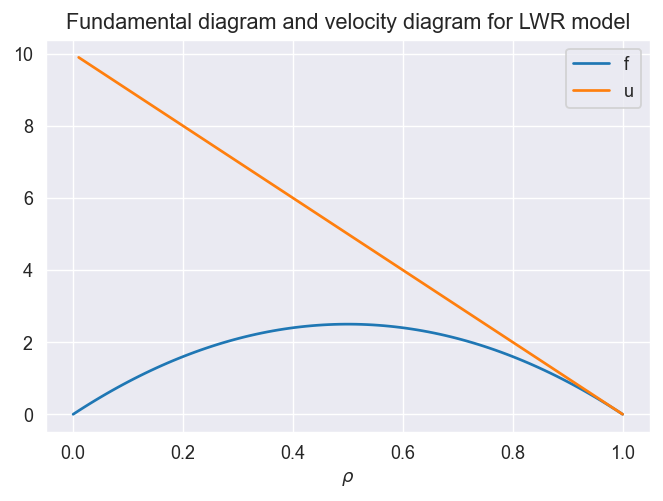

In [16]:
rho_max = 1
u_max = 10
rho = np.linspace(0, rho_max, 100)

plt.plot(rho, f(rho, u_max, rho_max), label="f")
plt.plot(rho, u(rho, u_max, rho_max), label="u")
plt.title("Fundamental diagram and velocity diagram for LWR model")
plt.xlabel(r"$\rho$")
plt.legend()

>First order model: $$\frac{\partial \rho}{\partial t} + \frac{\partial}{\partial x}f\left(\rho\right) = 0.$$

>Model with the diffusion term: $$\frac{\partial \rho}{\partial t} + \frac{\partial}{\partial x}f\left(\rho\right) = \epsilon \frac{\partial}{\partial x}\left(\kappa(\rho) \frac{\partial \rho}{\partial x}\right),$$ where $\epsilon$ is a parameter corresponding to the strength of the diffusion, $\kappa(\rho)$ is the diffusion coefficient.

>Model with the momentum balance of a continuum: $$\frac{\partial \rho}{\partial t} + \frac{\partial}{\partial x}f\left(\rho\right) = A[\rho, u, D\rho, Du],$$ where $A$ is a model for the generalized forces responsible for momentuum variations.

>Second order model: $$\begin{equation*}
  \begin{cases}
  \frac{\partial \rho}{\partial t} + \frac{\partial}{\partial x}f\left(\rho\right) &=& 0,\\
  \frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} &=& a[\rho, u, D\rho, Du]
  \end{cases}
\end{equation*}$$

### LWR model

$$\begin{array}{lcl}
f(\rho) &=& u_{\text{max}} \rho \left(1 - \frac{\rho}{\rho_{\text{max}}}\right) \\
u(\rho) &=& u_{\text{max}} \left(1 - \frac{\rho}{\rho_{\text{max}}}\right)
\end{array}
$$ where $q = f(\rho)$.


### Greenshield model

This model is a generalization of the LWR model. $$\begin{array}{lcl}
f(\rho) &=& u_{\text{max}} \rho \left[1 - \left(\frac{\rho}{\rho_{\text{max}}}\right)^n\right] \\
u(\rho) &=& u_{\text{max}} \left[1 - \left(\frac{\rho}{\rho_{\text{max}}}\right)^n\right]
\end{array}
$$ where $q = f(\rho)$.

## Finite volume method

We will consider general conservation law equation (possibly nonlinear) in the form $$u_t(x, t) + f(u(x, t))_x = 0.$$

- Consider a space-time cell $[x_{j - 1/2}, x_{j +  1/2}] \times [t_n, t_{n+1}]$ where $x_j = jk, x_{j \pm 1/2} = x_j \pm k/2, t_n = nh.$
- The cell average $u_j^n := \frac{1}{k} \int\limits_{x_{j-1/2}}^{x_{j+1/2}} u(x, t_n) dx.$
- The numerical flux $F_{j+1/2}^n := \frac{1}{h} \int\limits_{t_n}^{t_{n+1}} f(u(x_{j+1/2}, t))dt.$

$$u_j^{n+1} = u_j^n - \frac{h}{k}\left(F_{j+1/2}^n - F_{j-1/2}^n\right)$$

In our case:

One-dimensional model:
- $\rho = \rho(t, x)$ density of cars at time $t$ in the point $x$,
- $u = u(t, x)$ average velocity at time $t$ in the point $x$,
- $q = q(t, x) = \rho u$ the flux. 

$$\rho_t(x, t) + f(\rho(x, t))_x = 0$$

Consider a space-time cell $[x_{j - 1/2}, x_{j +  1/2}] \times [t_n, t_{n+1}]$ where $x_j = jk, x_{j \pm 1/2} = x_j \pm k/2, t_n = nh.$
- The cell average $\rho_j^n := \frac{1}{k} \int\limits_{x_{j-1/2}}^{x_{j+1/2}} \rho(x, t_n) dx.$
- The numerical flux $F_{j+1/2}^n := \frac{1}{h} \int\limits_{t_n}^{t_{n+1}} f(\rho(x_{j+1/2}, t))dt.$

$$\rho_j^{n+1} = \rho_j^n - \frac{h}{k}\left(F_{j+1/2}^n - F_{j-1/2}^n\right)$$


$f(\rho) = u_{\text{max}} \rho \left(1 - \frac{\rho}{\rho_{\text{max}}}\right) $

In our case $F_{j+1/2}^n = f(\rho_j^n) = u_{\text{max}}\rho_j^n\left(1 - \frac{\rho_j^n}{\rho_{\text{max}}}\right)$. Therefore 
$$\rho_j^{n+1} = \rho_j^n - \frac{h}{k}u_{\text{max}}\left(\rho_j^n\left(1 - \frac{\rho_j^n}{\rho_{\text{max}}}\right) - \rho_{j-1}^n\left(1 - \frac{\rho_{j-1}^n}{\rho_{\text{max}}}\right)\right)$$

Our equation:

$$\rho_t + u_{\text{max}}\left(\rho_x\left(1 - \frac{\rho}{\rho_{\text{max}}}\right) + \rho\left(- \frac{\rho_x}{\rho_{\text{max}}}\right)\right) = 0$$



$$\rho_t + u_{\text{max}}\left(\rho_x - 2\frac{\rho\rho_x}{\rho_{\text{max}}}\right) = 0$$

$$\rho_t + u_{\text{max}}\rho_x\left(1 - 2\frac{\rho}{\rho_{\text{max}}}\right) = 0$$

In [15]:
import numpy as np
import scipy.integrate as integrate

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns

import pandas as pd
import random

import seaborn as sns
import matplotlib as mpl
sns.set_style("darkgrid")
mpl.rcParams['figure.dpi'] = 130

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [72]:
def finite_volume_method(u_max, rho_max=50, a=0, b=10, T=10, k=0.01, h=0.01):
    """
    Implementation of the Finite Volume method for the vehicular traffic model.
    
    Arguments:
    (a, b) - spatial range
    T - time horizon
    k - spatial step
    h - time step
    """
    
    xs = np.arange(a, b, k)
    ts = np.arange(0, T, h)
    
    rho = np.zeros((len(xs), len(ts)))
#     rho[:,0] = np.zeros(len(xs))  #initial condition at t=0
    for j in range(len(xs)):
        if xs[j] < (b - a)/2:
            rho[j,0] = 0.2
        else:
            rho[j,0] = 0.8
    rho[0,:] = 10*np.array(random.choices([0, 1], k=len(ts)))# np.ones(len(ts)) # boundary condition at x=0 ???
     
    for j in range(1, len(xs)):
        for n in range(1, len(ts)):
            rho[j,n] = rho[j,n-1] - h/k*u_max*(rho[j,n-1]*(1 - rho[j,n-1]/rho_max) - rho[j-1,n-1]*(1 - rho[j-1,n-1]/rho_max))
    
    return rho, xs, ts

In [68]:
finite_volume_method(50)

C:\Users\joann\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in double_scalars
C:\Users\joann\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


(array([[ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  1.000000e+00,
          1.000000e+00,  0.000000e+00],
        [ 2.000000e-01, -9.760000e+00,  5.734976e+02, ...,           inf,
                   inf,           inf],
        [ 2.000000e-01,  2.000000e-01, -5.930176e+02, ...,           nan,
                   nan,           nan],
        ...,
        [ 8.000000e-01,  8.000000e-01,  8.000000e-01, ...,           nan,
                   nan,           nan],
        [ 8.000000e-01,  8.000000e-01,  8.000000e-01, ...,           nan,
                   nan,           nan],
        [ 8.000000e-01,  8.000000e-01,  8.000000e-01, ...,           nan,
                   nan,           nan]]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
     

C:\Users\joann\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in double_scalars
C:\Users\joann\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


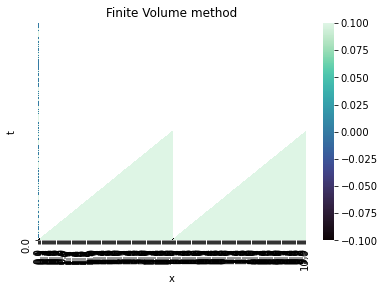

In [73]:
result = finite_volume_method(50)

xs = result[1]
ts = result[2]

ax = sns.heatmap(pd.DataFrame(result[0].T, columns = np.round(xs,1), index = ts), cmap='mako', xticklabels=4, yticklabels=4000)
ax.invert_yaxis()
plt.title('Finite Volume method')

plt.xlabel('x')
plt.ylabel('t')
plt.show()

**PYTANIA**
- jak aproksymować duże F?
- jakie warunki początkowe?
- jakie warunki brzegowe?
- jakie argumenty funkcji?
- shockfitting związane z warunkami początkowymi (trzeba dać konkretne liczby, czy trzeba liczyć na kartce)???
- czy tę całkę w funkcji możemy odeint czy też numerycznie?
- czy rozważać coś poza LWR?


Dopisać te założenia do funkcji flux w introduction?